## SHAP 

<p align=center>
<img src="https://shap.readthedocs.io/en/latest/_images/shap_header.png" width="70%"></p>

Os valores de Shapley - um método da teoria dos jogos de coalizão - nos dizem como distribuir de maneira justa o "pagamento" entre as features. Jogadoras? Jogos? Pagamento? Qual é a conexão com as previsões e a interpretabilidade do aprendizado de máquina? O "jogo" é a tarefa de previsão para uma única instância do conjunto de dados.


#### Como calculamos o valor de Shapley para uma das features  ? 

O valor de Shapley é a contribuição marginal média de um valor de features em todas as coalizões possíveis.
A interpretação do valor de Shapley para o valor do recurso j é: O valor do j-ésimo recurso contribuiu com para a previsão dessa instância específica em comparação com a previsão média para o conjunto de dados. 
ϕ
j
 
O valor de Shapley funciona tanto para classificação (se estamos lidando com probabilidades) quanto para regressão.


#### Exemplo: 

Usamos o valor de Shapley para analisar as previsões de um modelo florestal aleatório que prediz câncer de colo do útero :
<p align=center>
<img src="https://christophm.github.io/interpretable-ml-book/images/shapley-cervical-plot-1.png" width="70%"></p>

Tenha cuidado para interpretar o valor de Shapley corretamente: O valor de Shapley é a contribuição média de um valor da feature para a previsão em diferentes coalizões. O valor de Shapley NÃO é a diferença na previsão quando removeríamos a feature do modelo.

### Cálculo do Shapley 

Estamos interessados em como cada feature afeta a previsão de um ponto de dados. Em um modelo linear, é fácil calcular os efeitos individuais. Aqui está a aparência de uma previsão de modelo linear para uma instância de dados: 
<b>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow class="MJX-TeXAtom-ORD">
    <mover>
      <mi>f</mi>
      <mo stretchy="false">&#x005E;<!-- ^ --></mo>
    </mover>
  </mrow>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <msub>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <mo>&#x2026;<!-- … --></mo>
  <mo>+</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>p</mi>
    </mrow>
  </msub>
  <msub>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>p</mi>
    </mrow>
  </msub>
</math>
</b>

onde x é a instância para a qual queremos calcular as contribuições. Cada é um valor de recurso, com j = 1,…, p. O é o peso correspondente a funcionalidade j. 
x
j
  
β
j

<b>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>&#x03D5;<!-- ϕ --></mi>
    <mi>j</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mover>
      <mi>f</mi>
      <mo stretchy="false">&#x005E;<!-- ^ --></mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
    </mrow>
  </msub>
  <msub>
    <mi>x</mi>
    <mi>j</mi>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <mi>E</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
    </mrow>
  </msub>
  <msub>
    <mi>X</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
    </mrow>
  </msub>
  <msub>
    <mi>x</mi>
    <mi>j</mi>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
    </mrow>
  </msub>
  <mi>E</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>X</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
</math>
    
    </b>

onde é a estimativa do efeito médio para o recurso j. A contribuição é a diferença entre o efeito do recurso menos o efeito médio. Agradável! Agora sabemos quanto cada recurso contribuiu para a previsão. Se somarmos todas as contribuições de recurso para uma instância, o resultado é o seguinte: 
E
(
β
j
X
j
)

<b>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true">
    <mtr>
      <mtd>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
            <mo>=</mo>
            <mn>1</mn>
          </mrow>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>p</mi>
          </mrow>
        </munderover>
        <msub>
          <mi>&#x03D5;<!-- ϕ --></mi>
          <mi>j</mi>
        </msub>
        <mo stretchy="false">(</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>f</mi>
            <mo stretchy="false">&#x005E;<!-- ^ --></mo>
          </mover>
        </mrow>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
      </mtd>
      <mtd>
        <mi></mi>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
            <mo>=</mo>
            <mn>1</mn>
          </mrow>
          <mi>p</mi>
        </munderover>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>&#x03B2;<!-- β --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
          </mrow>
        </msub>
        <msub>
          <mi>x</mi>
          <mi>j</mi>
        </msub>
        <mo>&#x2212;<!-- − --></mo>
        <mi>E</mi>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>&#x03B2;<!-- β --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
          </mrow>
        </msub>
        <msub>
          <mi>X</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
          </mrow>
        </msub>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">)</mo>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mo>=</mo>
      </mtd>
      <mtd>
        <mi></mi>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>&#x03B2;<!-- β --></mi>
          <mn>0</mn>
        </msub>
        <mo>+</mo>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
            <mo>=</mo>
            <mn>1</mn>
          </mrow>
          <mi>p</mi>
        </munderover>
        <msub>
          <mi>&#x03B2;<!-- β --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
          </mrow>
        </msub>
        <msub>
          <mi>x</mi>
          <mi>j</mi>
        </msub>
        <mo stretchy="false">)</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>&#x03B2;<!-- β --></mi>
          <mn>0</mn>
        </msub>
        <mo>+</mo>
        <munderover>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
            <mo>=</mo>
            <mn>1</mn>
          </mrow>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>p</mi>
          </mrow>
        </munderover>
        <mi>E</mi>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>&#x03B2;<!-- β --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
          </mrow>
        </msub>
        <msub>
          <mi>X</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>j</mi>
          </mrow>
        </msub>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">)</mo>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mo>=</mo>
      </mtd>
      <mtd>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>f</mi>
            <mo stretchy="false">&#x005E;<!-- ^ --></mo>
          </mover>
        </mrow>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mi>E</mi>
        <mo stretchy="false">(</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>f</mi>
            <mo stretchy="false">&#x005E;<!-- ^ --></mo>
          </mover>
        </mrow>
        <mo stretchy="false">(</mo>
        <mi>X</mi>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">)</mo>
      </mtd>
    </mtr>
  </mtable>
</math>
    
</b>

Este é o valor previsto para o ponto de dados x menos o valor médio previsto. As contribuições das features podem ser negativas.

Podemos fazer o mesmo para qualquer tipo de modelo? Seria ótimo ter isso como uma ferramenta independente de modelo. Como geralmente não temos pesos semelhantes em outros tipos de modelo, precisamos de uma solução diferente.

A ajuda vem de lugares inesperados: teoria dos jogos cooperativos. <b>O valor Shapley é uma solução para calcular contribuições de features para previsões únicas para qualquer modelo de Machine learning.</b>

<hr>

<br>
<hr>

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


# Corrigir valores científicos  
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import tqdm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

<hr>
<br>
<br>
<hr>

### Sobre modelo 

O problema a ser resolvido é da área da saúde, os dados foram disponibilizados no Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci o objetivo é criar um modelo preditivo que identifique, se a pessoa tem ou não uma doença cardíaca apartir dos dados recolhidos de uma série de exames. esse modelo foi feito em outro projeto meu no Github o foco aqui é utilizar esse modelo para entender, as decisões tomadas pelo modelo e como ele identificou cada feature, sua importância e seu impacto na predição final. 

In [2]:
path_heart = 'heart.csv'
heart = pd.read_csv(path_heart)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [3]:
X = heart.drop('target', axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.8131868131868132


<br>
<hr>
<hr>

### SHAP - Classificação 

In [7]:
import shap 
shap.initjs()
%lsmagic
%%js

UsageError: Line magic function `%%js` not found.


<hr>
Explainer deve ser compatível com o modelo, neste caso o algoritimo K-NN utiliza as probabilidades como primeiro parâmetro e o segundo os dados de treino.
    
shap_values vamos inserir os dados de teste 

In [8]:
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_train)  # Interpretar os dados de treino 

Using 212 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Na classificação será uma lista com duas Matrizes, separando em previsões exemplo: Se for uma classificação binária ele vai criar duas matrizes representando cada predição desta classe, para explicar os valores previstos de cada classe, Para cada observação ele cria um valor shap.

Duas matrizes de probabilidades para cada classe. 

In [9]:
# classe Sem Doença cardíaca
shap_values[0].shape

(212, 13)

In [10]:
# classe Com Doença cardíaca
shap_values[1].shape

(212, 13)

In [11]:
# Nome das colunas 
columns = heart.columns
columns = columns.drop('target')

<br>

### Force Plot 

Neste gráfico de força ele mostra, o <b> Base Value </b> que significa sem a inferência de nenhuma outra variável qual é a probabilidade de ser uma Doença cardíaca. As cores da barra diferenciam em Força, vermerlho representa probabilidades altas e o azul probabilidades mais baixas de pertencer a classe. 

(Os valores numéricos apresentam os valores de algumas Features dos modelos, e o impacto que tem na probabilidade de pertencer a classe, <b>informando o nome das Features</b>)

O primeiro parâmetro Expected_value vai usar os valores médios da classe, o segundo parâmetro passamos os valores dessa classe, e o útlimo passamos o conjunto de dados de teste.

<br>

In [12]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train[0,:], feature_names=columns)

<br>
<hr>

Outra forma de apesentação do Force Plot é apresentar todas as features, neste formato o gráfico no eixo Y é representado pela Probabilidade de pertecer a Classe 1 (que neste caso é o diagnótisco com doença cardíaca) e no eixo X é colocada os valores das features de forma individual.

<b> Você consegue ordenar as features por: </b>
* Similaridade 
* Order de saída de valores 
* Orderm da amostra 
* Feature individual 

Você consegue analisar feature por feature, para entender o ponto exato em que o modelo começa tomar uma decisão, extremamente importante para entender os resultados do modelo. 

In [13]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_train, feature_names=columns)

Selecionei a feature <b> Thalach </b> que diz a frequência cardíaca máxima da pessoa, podemos ver claramente nos primeiros exemplos que, quanto menor  for o valor da frequência cardíaca da pessoa menor a probabilidade de pertencer a classe 1 que seria classificada com Doença cardíaca. 

Os primeiros exemplos da amostra mostram uma probabilidade de <b>42%</b> de chances de ser classificada como uma doença cardíaca, mas se avançarmos no gráfico, encontramos o relacionamento da frequência cardíaca com outra features como Sexo a Angina, as probabilidade quanto maior forem seus valores, a probabilidade de ser classificado com doença cardíaca aumenta para <b> 85% </b>. 

Pode-se explorar muito mais neste gráfico, neste exemplo eu fiz a análise em apenas uma variável em exclusiva, mas as possibildiades são ilimitadas basta procurar entender a fundo, a interpretação do modelo quanto as features e seus valores, neste problema de classificação para a área da Saúde é muito interessante, pois pequenas mudanças nos valores de uma features individual, afeta toda a decisão do modelo. 

<br>
<br>
<hr>

### Summary Plot 

O summary plot basicamente vai mostrar as features mais importantes na intepretação do modelo. Ele ordena de forma descrecente a importância de cada feature no modelo. No eixo X tem o valor do impacto no modelo quanto mais a direita maior o impacto, quanto mais a esquerda menor o impacto da feature na classificação. 

Esse gráfico do SHAP nos mostra em proporção de todos os exemplos na amostra que você passou para o modelo, cada pontinho representa um exemplo no conjunto de dados. Esse plot mostra bem como o modelo está distinguindo a previsão apartir das relações da features com predição final do modelo. 

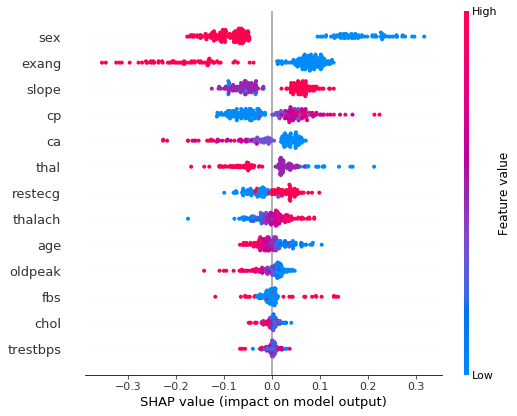

In [14]:
shap.summary_plot(shap_values[1], X_train, feature_names=columns)

A primeira feature considerada com a maior importância pelo modelo é o <b> Sexo</b> da pessoa, no conjunto de dados o valor Masculino = 1 e Feminino = 0 o modelo separou bem homens de mulheres, entendendo que se o paciente for uma Mulher o diagnóstico tem uma probabilidade maior de possuir uma doença cardíaca.

Logo em seguida a segunda feature mais importante na decisão do modelo, foi <b> "Exang" que representa a Angina (A angina causa sensação de aperto, pressão, peso ou dor no peito)</b> o modelo entendeu que, se a pessoa possui esse sintoma a chance dela ter uma doença cardíaca diminui, o oposto diz que se o paciente não tiver esse sintoma o modelo entende que as chances de ser classificada como uma doença cardíaca aumenta.   

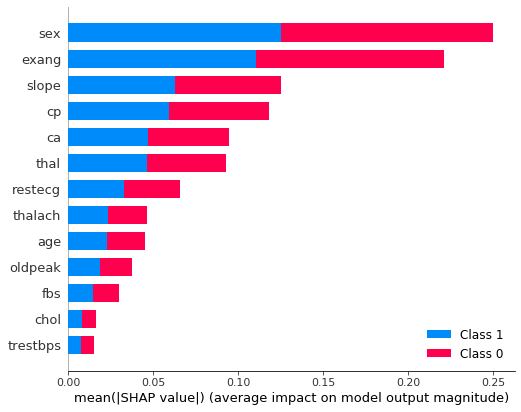

In [15]:
shap.summary_plot(shap_values, X_train, feature_names=columns)

Plotado desta forma ele mostra a importância de cada Feature para uma determinada classe, dividindo a legenda entre Classe 1 e Classe 0 

<br>
<hr>
    

### Dependence Plot 

Um dos gráficos mais simples do SHAP e mais intuitivo, neste análise eu consigo entender a variação da feature ea decisão tomada pelo modelo, olhando exclusivamente uma feature da sua escolha. No eixo X fica o valor da feature e no eixo Y fica os valores shap de impacto na predição de ser neste caso da classe 1 (doença cardíaca)

Pontos possitivos do Dependence Plot: 
* Análise de variação
* Entendimento das Features 
* Impactos na predição 

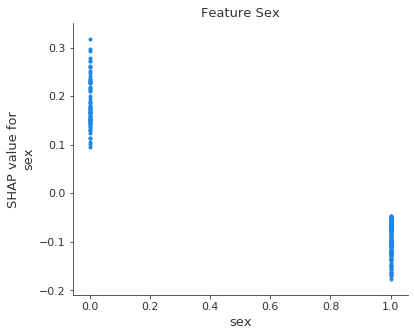

In [16]:
shap.dependence_plot('sex', shap_values[1], X_train,  feature_names=columns, interaction_index=None, title='Feature Sex')

Analisando a feature mais importante pela interpretação do SHAP neste modelo, que é a feature <b> sex</b> é de fácil entendimento que o modelo entendeu que, o paciente ser do Sexo feminino as chances de ter uma doença cardíaca é maior, já os homens tem uma probabilidade menor. 

<b> Eu tenho a hipótese de que o modelo está considerando o sexo a feature mais importante, pelo fato de conter mais casos de doença cardíaca em mulheres do que em homens nesta base de dados em específico, por isso há um pouco desse viés que o modelo capturou. </b>

<br>

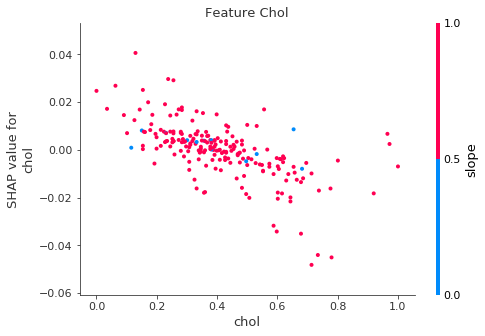

In [17]:
shap.dependence_plot('chol', shap_values[1], X_train,  feature_names=columns, interaction_index='slope',title='Feature Chol')

Olhando para a feature Chol (Medição do colesterol da pessoa) ele está comparando com uma feature secundária no eixo Y do lado direito do gráfico, que é a feature Slope (A inclinação do segmento ST do pico) e vemos a mudança que há no impacto da predição ser da classe 1. 

A intepretação que tenho desde gráfico é a seguinte, quanto menor for o colesterol da pessoa e maior for a inclinação do segmento maior é a influência de ser classificada com doença cardíaca, repare que conseguimos ver que há muitos valores neutros, que estão presentes no valor 0 do SHAP value no eixo Y há esquerda do plot, isso se dá pela correlação que as duas variáveis tem que é de: <b> - 0.004 </b> uma pequena correlação negativa, o que faz total sentido neste gráfico pois quando uma variável cresce o valor da outra diminui. 

Vale resaltar que quanto maior o colesterol e maior a inclinação do segmento, temos poucos dados que indicam uma chance bem menor de ser classificada como doença cardíaca. 

<br>
<hr>

### Decision Plot 

In [18]:
# Transformando em Lista 
columns = list(columns)

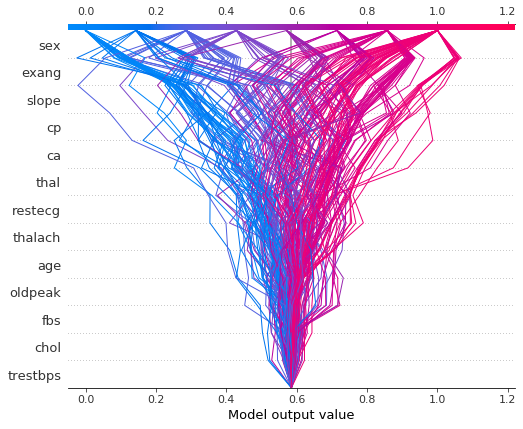

In [19]:
# Classe 1 
plt.figure(figsize=(12,7))
shap.decision_plot(explainer.expected_value[1], shap_values[1], feature_names=columns) 

<hr>
<hr>

### Referências

https://github.com/slundberg/shap <br>
https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d